In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [38]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



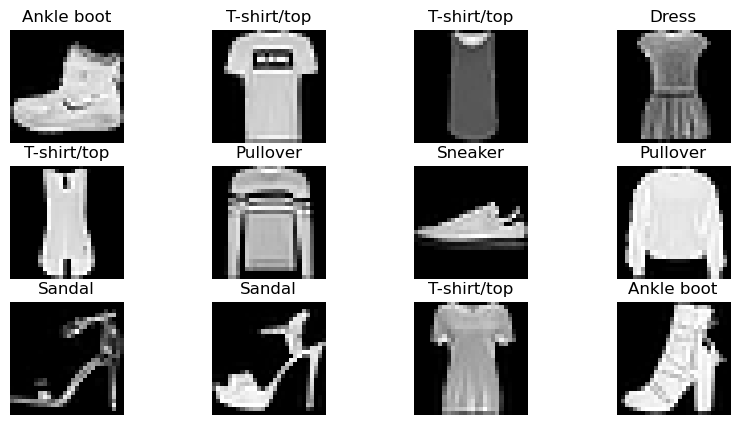

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 12 images
plt.figure(figsize=(10,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

In [40]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 784-dim vectors (FCNN requirement)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [41]:
x_train[9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.00392157, 0.        , 0.        , 0.        , 0.     

In [32]:
y_train[9]

5

In [42]:
model = tf.keras.models.Sequential() # gives the linear stack of layers - object

#--------------#
# Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train.shape[1:]))


#--------------#
# 1st Hidden Layer
model.add(tf.keras.layers.Dense(
    units = 128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

#--------------#
# 2nd Hidden Layer
model.add(tf.keras.layers.Dense(
    units = 128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

#--------------#
# Output Layer
model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax
))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Compile the Model

In [44]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02)

In [45]:
model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']

)

In [46]:
training_hist = model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9911 - accuracy: 0.7280 - val_loss: 0.8481 - val_accuracy: 0.7587
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8856 - accuracy: 0.7396 - val_loss: 0.9405 - val_accuracy: 0.7439
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8793 - accuracy: 0.7423 - val_loss: 0.9807 - val_accuracy: 0.6828
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8837 - accuracy: 0.7374 - val_loss: 0.8329 - val_accuracy: 0.7328
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8728 - accuracy: 0.7364 - val_loss: 0.8944 - val_accuracy: 0.7395
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8568 - accuracy: 0.7441 - val_loss: 0.7886 - val_accuracy: 0.7666
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8554 - accuracy: 0.7427 - val_loss: 0.8896 - val_accuracy:

In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9875 - accuracy: 0.6674
Test Accuracy: 0.6674


In [48]:
y_pred_probs = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [49]:
y_pred_probs

array([[4.9580420e-05, 1.2365682e-07, 2.1071987e-06, ..., 5.4953903e-01,
        1.1421831e-02, 8.8969074e-02],
       [7.3922306e-02, 2.6583362e-03, 4.5207578e-01, ..., 1.8494580e-06,
        4.4133663e-02, 1.0844655e-05],
       [5.7622970e-06, 9.8501313e-01, 1.9283198e-07, ..., 8.4531835e-14,
        1.1882091e-04, 3.5644276e-12],
       ...,
       [3.6691931e-01, 6.2474713e-04, 2.3828456e-02, ..., 1.4552525e-05,
        4.6265312e-02, 3.2373287e-03],
       [4.5000410e-04, 6.1884928e-01, 7.5178027e-06, ..., 8.3403397e-12,
        1.5854154e-03, 2.4930145e-09],
       [3.9960092e-04, 2.2682918e-06, 3.7646172e-05, ..., 3.2170773e-01,
        5.6716245e-02, 2.2956640e-02]], dtype=float32)

In [50]:
y_pred_classes = np.argmax(y_pred_probs, axis=1)

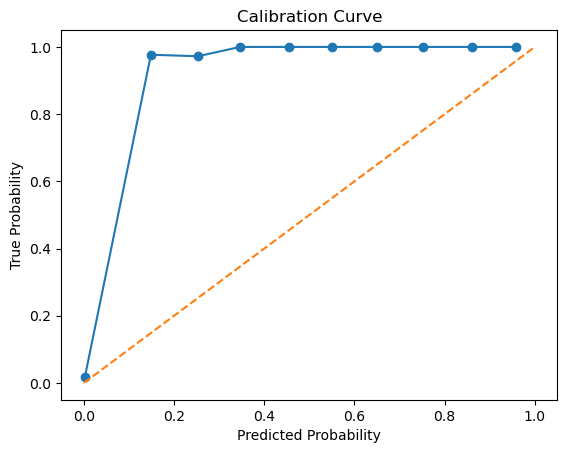

In [51]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test == 1, y_pred_probs[:, 1], n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.show()

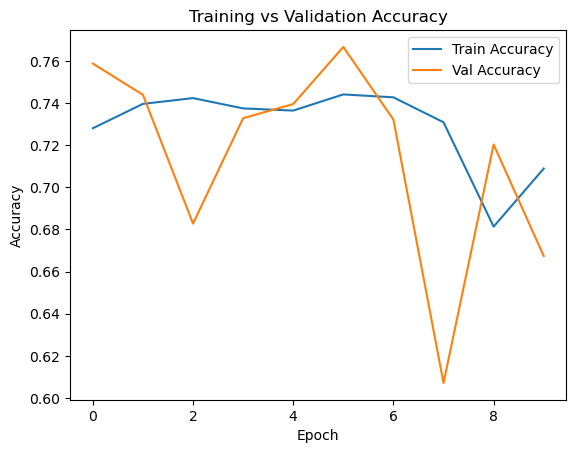

In [52]:
plt.plot(training_hist.history['accuracy'], label='Train Accuracy')
plt.plot(training_hist.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### With Stochastic Gradient as Optimizer

In [54]:
from tensorflow.keras.optimizers import SGD

In [55]:
model.compile(
    optimizer=SGD(learning_rate=0.01),  # You can tune the learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
training_hist = model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7489 - accuracy: 0.7614 - val_loss: 0.7483 - val_accuracy: 0.7606
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7148 - accuracy: 0.7682 - val_loss: 0.7186 - val_accuracy: 0.7651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6920 - accuracy: 0.7737 - val_loss: 0.7011 - val_accuracy: 0.7681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6749 - accuracy: 0.7760 - val_loss: 0.6867 - val_accuracy: 0.7687
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6608 - accuracy: 0.7786 - val_loss: 0.6737 - val_accuracy: 0.7717
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6493 - accuracy: 0.7812 - val_loss: 0.6631 - val_accuracy: 0.7756
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6405 - accuracy: 0.7835 - val_loss: 0.6545 - val_accuracy:

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.7716
Test Accuracy: 0.7716


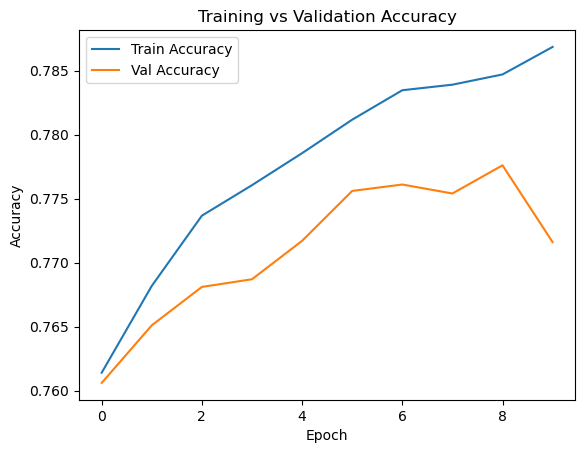

In [58]:
plt.plot(training_hist.history['accuracy'], label='Train Accuracy')
plt.plot(training_hist.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()